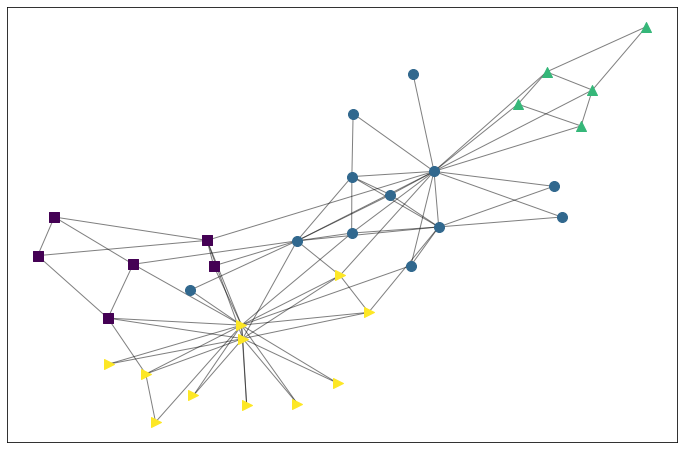

In [3]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
shapes = 'so^>v<dph8'

plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[color])

/home/mahmood/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


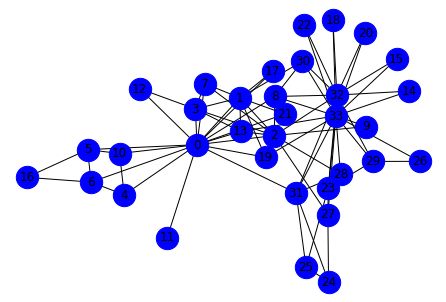

In [4]:
# help to draw https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
nx.draw(G,with_labels = True,node_color='b',node_size=500);

from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("tmp/embedding.emb") #save the embedding in file embedding.emb

In [6]:
from sklearn.cluster import KMeans
import numpy as np


X = np.loadtxt("tmp/embedding.emb", skiprows=1) # load the embedding of the nodes of the graph
#print(X)
# sort the embedding based on node index in the first column in X
X=X[X[:,0].argsort()]; 
#print(X)
Z=X[0:X.shape[0],1:X.shape[1]]; # remove the node index from X and save in Z

kmeans = KMeans(n_clusters=4, random_state=0).fit(Z) # apply kmeans on Z
labels=kmeans.labels_  # get the cluster labels of the nodes.
print(labels)
print(np.where(labels==0))

[1 1 3 1 2 2 2 1 3 3 2 1 1 3 0 0 2 1 0 3 0 1 0 0 0 0 0 0 3 0 0 0 0 0]
(array([14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33]),)


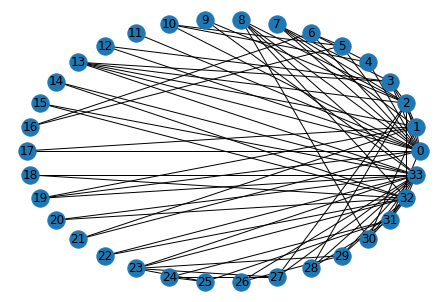

In [19]:
# partition
# print("Node Degree")
# for v in G:
#     print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [13]:
 G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [18]:
from cdlib.algorithms import louvain
communities = louvain(G)
mod = communities.normalized_cut()
mod

FitnessResult(min=0.27702702702702703, max=0.5118279569892473, score=0.36155066356679255, std=0.09014735201132601)

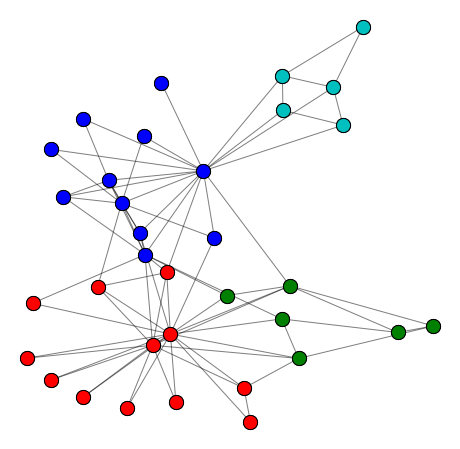

In [39]:
from cdlib import algorithms, viz
# com = algorithms.kclique(G, k=4)
com = algorithms.louvain(G)
pos = nx.spring_layout(G, seed=42)
viz.plot_network_clusters(G, com, pos)

In [24]:
com

In [20]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [40]:
import torch
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

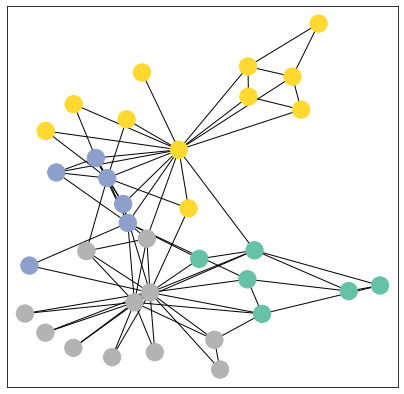

In [41]:
from torch_geometric.utils import to_networkx
data = dataset[0]  # Get the first graph object.
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)